In [149]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#For ignoring warnings
import warnings
warnings.filterwarnings("ignore")

#For Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Sklearn
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [150]:
SEED = 42  #random_state     

# Overview

This notebook is trying to using EDA and Classic Machine Learning Algorithms to sovle Kaggle's Titanic surviving competition. 
Steps including:
- [Baseline Model](#1.Baseline_Model)
- [EDA and Feature Engineering](#2.EDA_&_Feature_Engineering )
- [ML models (Logistic, KNN,DecisionTree,RandomForest,SVM,XGBoost)](#3.ML_Models)
- [Submission](#Submission)


# 1.Baseline_Model
* Dataset is not processed by feature engineering.
* Only do simple data cleaning and imputation (Strategy: median())
* NaiveBayes (val_acc = 0.78)
* Logistic (val_acc = 0.79)

In [151]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [152]:
print('training_set:',df.shape)
print('Coulumn_names:',df.columns.values)

training_set: (891, 12)
Coulumn_names: ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [153]:
print('training_set:',df_test.shape)
print('Column_names',df_test.columns.values)

training_set: (418, 11)
Column_names ['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [154]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [155]:
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [156]:
df.info() #check data datatypes and missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [157]:
df.isna().sum().sort_values(ascending=False) # check amount of null numbers

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [158]:
df.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [159]:
# To see which one appears most frequently
df['Embarked'].value_counts() 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [160]:
# Just remove columns that can't use for calculation 
df.drop(['Cabin','Ticket','Name'],axis=1,inplace=True)

In [161]:
# Imputation with median(Age)
df['Age'].fillna(df['Age'].median(),inplace=True)

In [162]:
# Imputation with most frequent one
df['Embarked'].fillna('S',inplace=True)

In [163]:
# categorical data preprocessing
df=pd.get_dummies(df,drop_first=True)

In [164]:
# get training set
train = df.iloc[:,2:]
validation = df.loc[:,['Survived']]

In [165]:
clf = GaussianNB()
print("val_score: {:.2f} ".format(cross_val_score(clf,train,validation).mean()))

val_score: 0.78 


In [166]:
clf = LogisticRegression(random_state=SEED)
print("val_score: {:.2f} ".format(cross_val_score(clf,train,validation).mean()))

val_score: 0.79 


**Note:**

**The baseline performace are better then I expected, it means the dataset have already provided with useful information. Next step we gonna dive deeper into this dataset and trying to do some feature engineering to get model better than this one.**

# 2.EDA_&_Feature_Engineering 
* Feature engineering will both apply on train/test dataset to ensure feature amounts are equal.
* Data description can provide us some hint to FE.

In [167]:
# reload data set
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [168]:
df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [169]:
df_test.isna().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

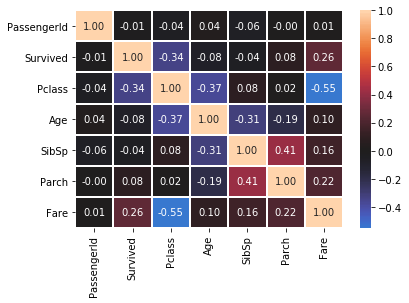

In [170]:
fig,ax =plt.subplots()
sns.heatmap(df.corr(), center=0, linewidths=1, annot=True, fmt='.2f')
fig.savefig("corr_map.png")

**Note:**

**A simple conclusion for the correlation matrix: Pclass and Fare are correlated to each other and also have high contribution to Surviving rate. However, there has some features are non numerical dtype which are not seen in this map, so futher analysis still required**

In [171]:
# just in case
drop_cols=[]

**0. Survived**
   * Take a look at on how target label looks like --> only 38% survived in training set

Surviving Rate: 0.383838


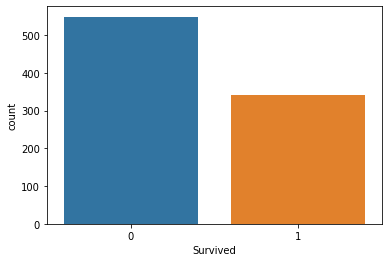

In [172]:
sns.countplot('Survived',data=df)
print('Surviving Rate: {0:2f}'.format(df['Survived'].sum()/len(df)))

**1. Pclass**
* This feature has been told to have higher correlation with surviving rate
* It needs to change dtype to category

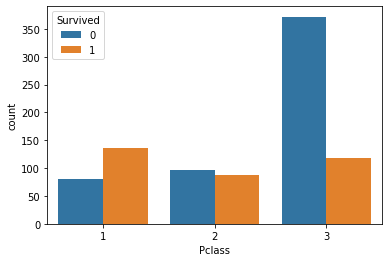

In [173]:
# Data Visulization
sns.countplot(df['Pclass'],hue='Survived',data=df)

In [174]:
# Change dtype tp Categorical
df['Pclass']=pd.Categorical(df['Pclass'])
df_test['Pclass']=pd.Categorical(df_test['Pclass'])

**2. Name**
* Extract titles from names, and categorized into Mr/Miss/Mrs/Master

In [175]:
# check text
df['Name'].head(3)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
Name: Name, dtype: object

In [176]:
# Extract title by regular expression pattern
df['Title']=df['Name'].str.extract(r'([a-zA-Z]+)\.')
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Lady          1
Don           1
Sir           1
Capt          1
Countess      1
Ms            1
Mme           1
Jonkheer      1
Name: Title, dtype: int64

In [177]:
df_test['Title']=df_test['Name'].str.extract(r'([a-zA-Z]+)\.')
df_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [178]:
# check if there is one who doesn't have title 
print(df['Title'].isnull().sum())
print(df_test['Title'].isnull().sum())

0
0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

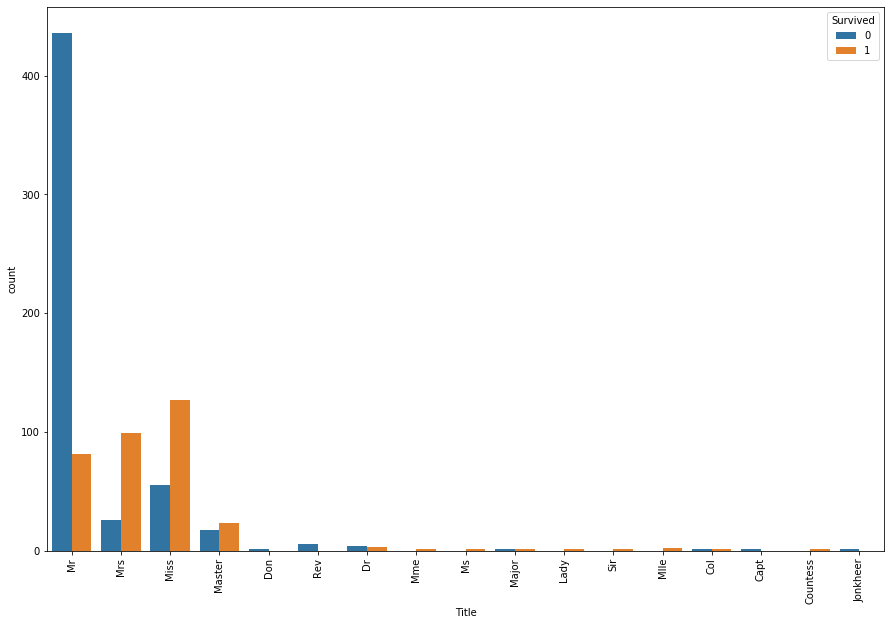

In [179]:
plt.figure(figsize=(15,10))
sns.countplot(df['Title'],hue='Survived',data=df)
plt.xticks(rotation=90)

In [180]:
df_piv=df.pivot_table(index=df['Title'],values=['Age','Survived'],aggfunc=[np.mean,np.std])
df_piv.loc[['Mr','Miss','Mrs','Master']]

mean                  std          
              Age  Survived        Age  Survived
Mr      32.368090  0.156673  12.708793  0.363844
Miss    21.773973  0.697802  12.990292  0.460477
Mrs     35.898148  0.792000  11.433628  0.407510
Master   4.574167  0.575000   3.619872  0.500641

In [181]:
mask=df['Title'].isin(['Mr', 'Miss', 'Mrs', 'Master'])
df.loc[mask==False,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,Don
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S,Rev
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S,Rev
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,Dr
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0000,NaN,S,Rev
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,Dr
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,Mme
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,Dr
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S,Ms
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S,Major


In [182]:
mask=df['Title'].isin(['Mr', 'Miss', 'Mrs', 'Master'])
df.loc[(mask==False)&(df['Sex']=='female'),:]
df.loc[(mask==False)&(df['Sex']=='male'),['Title']]='Mr'

In [183]:
df['Title'].replace({"Mme":'Mrs','Ms':'Miss','Countess':'Mrs','Lady':'Mrs','Dr':'Mrs','Mlle':'Miss'},inplace=True)

In [184]:
df['Title'].value_counts()

Mr        537
Miss      185
Mrs       129
Master     40
Name: Title, dtype: int64

In [185]:
# feature engineering on Test set
mask=df_test['Title'].isin(['Mr', 'Miss', 'Mrs', 'Master'])
df_test.loc[mask==False,:]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
88,980,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.7500,NaN,Q,Ms
131,1023,1,"Gracie, Col. Archibald IV",male,53.0,0,0,113780,28.5000,C51,C,Col
149,1041,2,"Lahtinen, Rev. William",male,30.0,1,1,250651,26.0000,NaN,S,Rev
164,1056,2,"Peruschitz, Rev. Joseph Maria",male,41.0,0,0,237393,13.0000,NaN,S,Rev
202,1094,1,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C,Col
293,1185,1,"Dodge, Dr. Washington",male,53.0,1,1,33638,81.8583,A34,S,Dr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona


In [186]:
df_test.loc[(mask==False)&(df_test['Sex']=='male'),['Title']]='Mr'
df_test['Title'].replace({'Ms':'Miss','Dona':'Mrs'},inplace=True)
df_test['Title'].value_counts()

Mr        245
Miss       79
Mrs        73
Master     21
Name: Title, dtype: int64

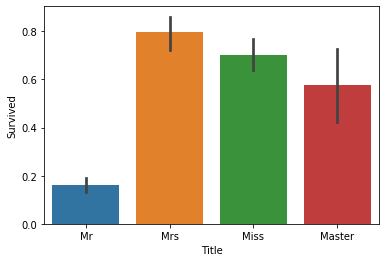

In [187]:
sns.barplot('Title','Survived',data=df)

In [188]:
drop_cols.append("Name")

3. Sex

Well, nothing we can do in this.

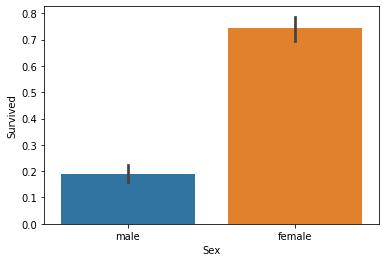

In [189]:
# Data Visualization
sns.barplot(x='Sex',y='Survived',data=df)

4. Age

Age is a continuous feature, but we are trying to spilt it into 8 bins since survival rate may varied along with different age stage

In [190]:
# check numer of missing values
df['Age'].isna().sum()

177

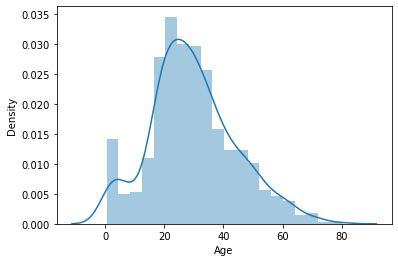

In [191]:
sns.distplot(df['Age'])

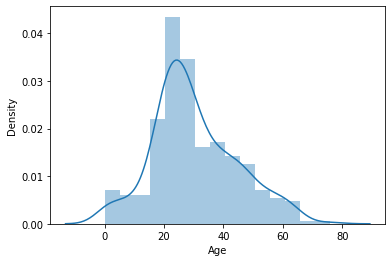

In [192]:
sns.distplot(df_test['Age'])

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

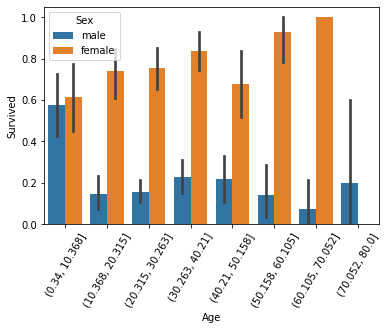

In [193]:
#split Age into 8 equal intervals
sns.barplot(x=pd.cut(df['Age'],bins=8),y='Survived',hue='Sex',data=df)
plt.xticks(rotation=60)

In [194]:
# Imputation with median(Age)
df['Age_imp']=df['Age'].isna()
df['Age'].fillna(df['Age'].median(),inplace=True)

In [195]:
# Imputation with median(Age)
df_test['Age_imp']=df_test['Age'].isna()
df_test['Age'].fillna(df_test['Age'].median(),inplace=True)

In [196]:
df['Age'] = pd.cut(df['Age'],bins=8)
df_test['Age'] = pd.cut(df_test['Age'],bins=8)

5. SibSp

In [197]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

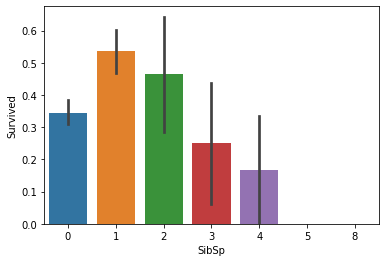

In [198]:
sns.barplot('SibSp','Survived',data=df)

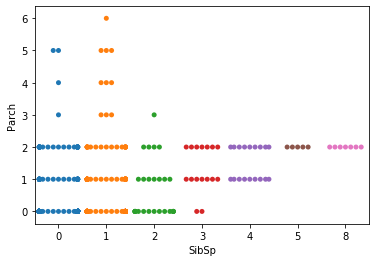

In [199]:
sns.swarmplot(x='SibSp',y='Parch',data=df)

**Note:**

Though it seems trivial to see only SibSp feature against Survive rate, perhaps combine this feature with another similar feature Parch can bring us more information.

6. Parch

Followed by the conclusion from SibSp, maybe we need to combine these two to get a more powerful feature.

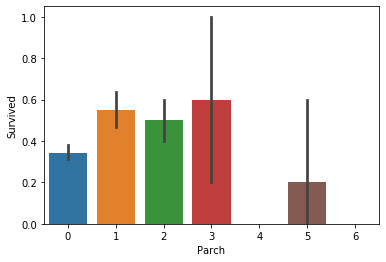

In [200]:
sns.barplot(x='Parch',y='Survived',data=df)

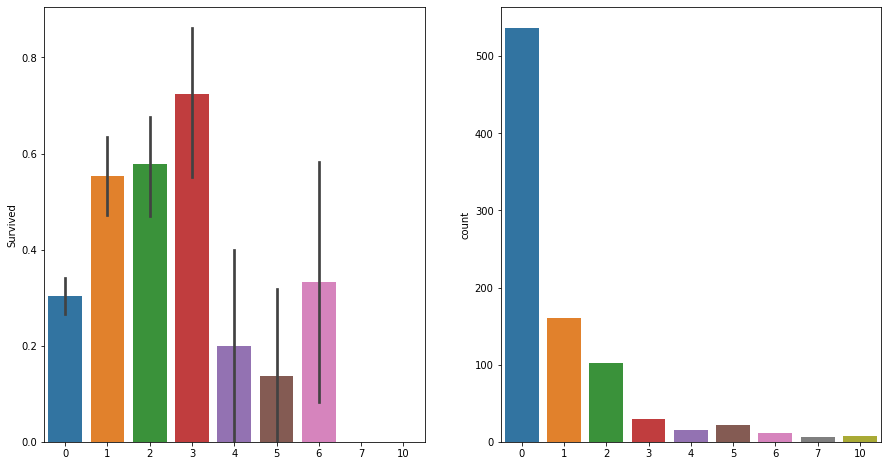

In [201]:
_,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,8))
sns.barplot(x=df['Parch']+df['SibSp'],y="Survived",data=df,ax=ax[0])
sns.countplot(x=df['Parch']+df['SibSp'],data=df,ax=ax[1])

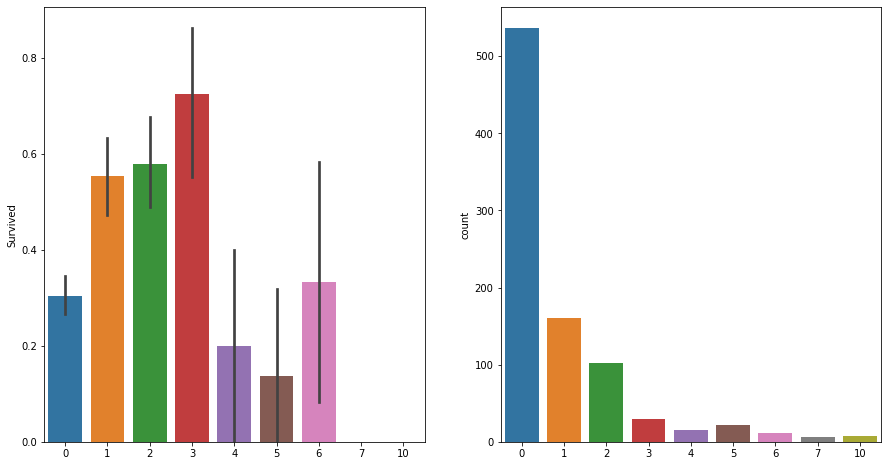

In [202]:
_,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,8))
sns.barplot(x=df['Parch']+df['SibSp'],y="Survived",data=df,ax=ax[0])
sns.countplot(x=df['Parch']+df['SibSp'],data=df,ax=ax[1])

In [203]:
# Family size 0 --> alone, 1-3 --> medium, above 4 --> large
df['Family_size'] = df['Parch'] + df['SibSp']
bins=[0,1,4,np.inf]
df['Family_size']=pd.cut(df['Family_size'],bins=bins,labels=["alone","medium","large"],include_lowest=True,right=False)

In [204]:
df['Family_size'].value_counts()

alone     537
medium    292
large      62
Name: Family_size, dtype: int64

In [205]:
df_test['Family_size'] = df_test['Parch'] + df_test['SibSp']
bins=[0,1,4,np.inf]
df_test['Family_size']=pd.cut(df_test['Family_size'],bins=bins,labels=["alone","medium","large"],include_lowest=True,right=False)
df_test['Family_size'].value_counts()

alone     253
medium    145
large      20
Name: Family_size, dtype: int64

In [206]:
drop_cols.append('Parch')
drop_cols.append('SibSp')

Note:

Seems like people who are single are intended to have higher death rate, also we cut our new Family_size feature to 3 categories to better seperate how survival may vary with this feature.

7.Ticket

In [207]:
temp = df['Ticket'].str.split(' ')

In [208]:
ticket_num=[]
for i in range(len(temp)):
    if len(temp[i])>1:
        ticket_num.append(temp[i][1][1:2])
    else:
        ticket_num.append(temp[i][0][1:2])

In [209]:
df['Ticket_num']=pd.Series(ticket_num)

In [210]:
df.pivot_table(index='Ticket_num',columns='Survived',values='Fare',aggfunc=[np.mean])

mean            
Survived            0           1
Ticket_num                       
            10.500000         NaN
.            7.582143    7.925000
0           16.255840   20.860840
1           26.548031   48.891846
2           13.564583   44.733333
3           23.056075   28.173612
4           14.913775   29.422091
5           16.348016   21.451323
6           14.567164   34.080250
7           51.060500  102.766733
8           17.055208   17.337500
9           38.898262   51.982692
I            0.000000    0.000000
a                 NaN   13.791700

In [211]:
#df['Ticket_num'].replace({"B":"9","L":"0"},inplace=True)
df['Ticket_num'].replace({' ':"0",".":"0"},inplace=True)
df['Ticket_num'].value_counts()

4    189
1    181
6    126
7    111
3     90
5     66
9     50
8     28
0     22
2     21
I      4
       2
a      1
Name: Ticket_num, dtype: int64

In [212]:
temp = df_test['Ticket'].str.split(' ')
ticket_num=[]
for i in range(len(temp)):
    if len(temp[i])>1:
        ticket_num.append(temp[i][1][:1])
    else:
        ticket_num.append(temp[i][0][:1])
df_test['Ticket_num']=pd.Series(ticket_num)
df_test['Ticket_num'].value_counts()

3    161
2    122
1    111
6      7
4      7
7      5
9      2
8      2
5      1
Name: Ticket_num, dtype: int64

In [213]:
df_test['Ticket_num']=pd.Categorical(df_test['Ticket_num'])
df['Ticket_num']=pd.Categorical(df['Ticket_num'])

In [214]:
drop_cols.append('Ticket')
drop_cols.append('Ticket_num')

**Note:**

I've tried to add a new feature if ticket_num, but it doesn't imporve our model a lot, so here I will still drop this colummn.

8.Fare

A left skewed continuous variable, so we better do some log transformation on it to ensure its normality. 

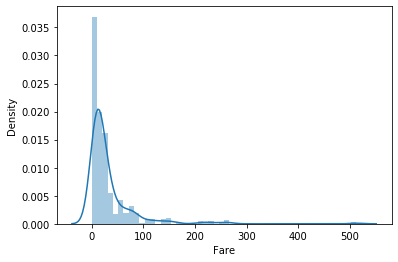

In [215]:
sns.distplot(df['Fare'])

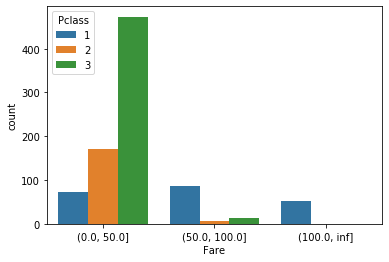

In [216]:
bins=[0,50,100,np.inf]
sns.countplot(pd.cut(df['Fare'],bins=bins),hue='Pclass',data=df)

In [217]:
df['Fare']=np.log(df['Fare']+0.1)
df_test['Fare']=np.log1p(df_test['Fare'])
df_test['Fare'].fillna(df_test['Fare'].median(),inplace=True)

In [218]:
df['Fare'].describe()

count    891.000000
mean       2.862231
std        1.145222
min       -2.302585
25%        2.080739
50%        2.677880
75%        3.437208
max        6.239163
Name: Fare, dtype: float64

In [219]:
pd.pivot_table(df,index='Pclass',columns='Embarked',values='Fare',aggfunc=[np.mean])

mean                    
Embarked         C         Q         S
Pclass                                
1         4.360597  4.500920  3.791415
2         3.136301  2.521721  2.727275
3         2.339604  2.301561  2.413704

In [220]:
df['Fare']=pd.cut(df['Fare'],bins=3)
df_test['Fare']=pd.cut(df_test['Fare'],bins=3)

9. Cabin

In [221]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [222]:
df['Cabin'] = df.loc[df['Cabin'].notnull(),'Cabin'].str.extract(r'([a-zA-z])')

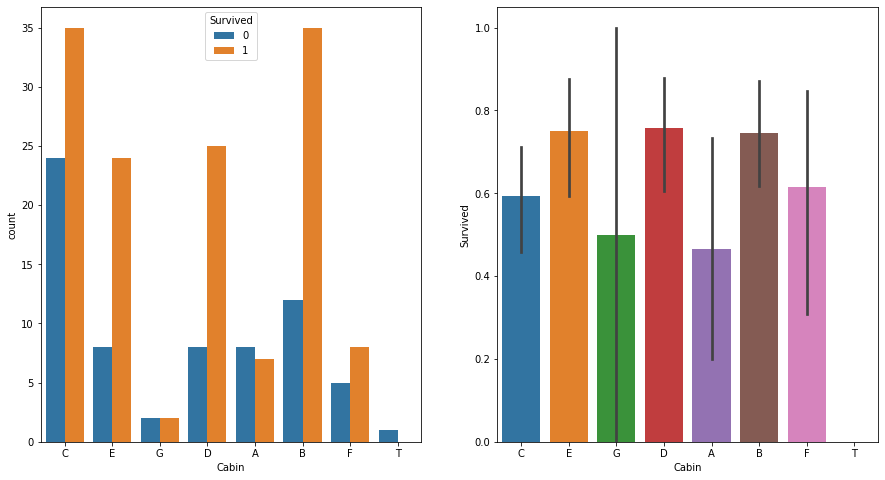

In [223]:
_,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,8))
sns.countplot('Cabin',hue='Survived',data=df,ax=ax[0])
sns.barplot(x='Cabin',y='Survived',data=df,ax=ax[1])

In [224]:
df['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [225]:
# assign 'U' to unkonwn cabin
df.loc[df['Cabin'].isna(),'Cabin'] = 'U'
df_test.loc[df_test['Cabin'].isna(),'Cabin'] = 'U'

In [226]:
df.groupby(['Cabin','Pclass'])['Fare','Survived'].agg([np.mean])

Survived
                  mean
Cabin Pclass          
A     1       0.466667
      2            NaN
      3            NaN
B     1       0.744681
      2            NaN
      3            NaN
C     1       0.593220
      2            NaN
      3            NaN
D     1       0.758621
      2       0.750000
      3            NaN
E     1       0.720000
      2       0.750000
      3       1.000000
F     1            NaN
      2       0.875000
      3       0.200000
G     1            NaN
      2            NaN
      3       0.500000
T     1       0.000000
      2            NaN
      3            NaN
U     1       0.475000
      2       0.440476
      3       0.235908

In [227]:
# Test set
df_test['Cabin'] = df_test.loc[df_test['Cabin'].notnull(),'Cabin'].str.extract(r'([a-zA-z])')
df_test['Cabin'].value_counts()

U    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64

In [228]:
df['Cabin'] = pd.Categorical(df['Cabin'])
df_test['Cabin']=pd.Categorical(df_test['Cabin'])

10. Embarked

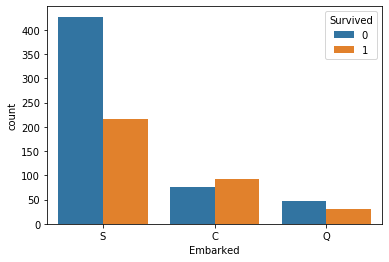

In [229]:
sns.countplot('Embarked',hue='Survived',data = df)

In [230]:
df_test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [231]:
pd.pivot_table(df,index='Embarked',columns='Pclass',values='Survived')

Pclass,1,2,3
Embarked,,,
C,0.694118,0.529412,0.378788
Q,0.500000,0.666667,0.375000
S,0.582677,0.463415,0.189802


In [232]:
df['Embarked'].fillna('S',inplace=True)
df_test['Embarked'].fillna('S',inplace=True)

In [233]:
df['Embarked'] = pd.Categorical(df['Embarked'])
df_test['Embarked'] = pd.Categorical(df_test['Embarked'])

In [234]:
drop_cols

['Name', 'Parch', 'SibSp', 'Ticket', 'Ticket_num']

In [235]:
df_all = pd.concat([df,df_test],axis=0).reset_index(drop=True)

In [236]:
df_all.drop(drop_cols,axis=1,inplace=True)

In [237]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Age            1309 non-null object
Age_imp        1309 non-null bool
Cabin          1309 non-null object
Embarked       1309 non-null category
Family_size    1309 non-null category
Fare           1309 non-null object
PassengerId    1309 non-null int64
Pclass         1309 non-null category
Sex            1309 non-null object
Survived       891 non-null float64
Title          1309 non-null object
dtypes: bool(1), category(3), float64(1), int64(1), object(5)
memory usage: 77.1+ KB


**Remember to do one hot encoded on Categorical variable**

In [238]:
# categorical data preprocessing
df_all=pd.get_dummies(df_all,drop_first=True)

In [239]:
df_all.columns

Index(['Age_imp', 'PassengerId', 'Survived', 'Age_(0.34, 10.368]',
       'Age_(9.649, 19.128]', 'Age_(10.368, 20.315]', 'Age_(19.128, 28.606]',
       'Age_(20.315, 30.263]', 'Age_(28.606, 38.085]', 'Age_(30.263, 40.21]',
       'Age_(38.085, 47.564]', 'Age_(40.21, 50.158]', 'Age_(47.564, 57.043]',
       'Age_(50.158, 60.105]', 'Age_(57.043, 66.521]', 'Age_(60.105, 70.052]',
       'Age_(66.521, 76.0]', 'Age_(70.052, 80.0]', 'Cabin_B', 'Cabin_C',
       'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U',
       'Embarked_Q', 'Embarked_S', 'Family_size_medium', 'Family_size_large',
       'Fare_(-0.00624, 2.08]', 'Fare_(0.545, 3.392]', 'Fare_(2.08, 4.161]',
       'Fare_(3.392, 6.239]', 'Fare_(4.161, 6.241]', 'Pclass_2', 'Pclass_3',
       'Sex_male', 'Title_Miss', 'Title_Mr', 'Title_Mrs'],
      dtype='object')

In [240]:
X = df_all.iloc[:891,2:]
y = df_all.iloc[:891,[1]]

In [241]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [242]:
# clf = GaussianNB()
# print("val_score: {:.2f} ".format(cross_val_score(clf,X,y).mean()))

In [243]:
# clf=LogisticRegression()
# print("val_score: {:.2f} ".format(cross_val_score(clf,X,y).mean()))


# 3.ML_Models
* Logistic regression (val_acc: 0.829)
* KNN (val_acc: 0.829)
* Decision Tree (val_acc: 0.836)
* Random Forest (val_acc:0.831)
* SVM (val_acc:0.829)
* XGBoost (Val_acc:0.841)


In [244]:
# this is dircetly copy from ski-learn website
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt



In [245]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,StratifiedKFold

In [246]:
cv= StratifiedKFold()

In [247]:
models=[]

# Logistic regression


In [148]:
lr=LogisticRegression()

params={
    "penalty": ["l1","l2"], # Lasso / Ridge regulation, I prefer to use l2, l1 is more like feature importance comparism
    "C": [0.01,0.1,1,10], # Similar to learning rate, strength of regulation.
    "max_iter": [50,100,200,300,400], # This is not a complex model, so iteration wouldn't be too large.
    
}

clf=GridSearchCV(estimator=lr,param_grid=params,)
clf.fit(X,y)
models.append(("Logistic",clf.best_estimator_))
clf.best_params_

ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [ ]:
plot_learning_curve(clf.best_estimator_, "LReg", X, y, ylim=(0.7, 1.01),cv=cv, n_jobs=-1)

In [ ]:
clf.best_score_

# KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
params ={
    "n_neighbors":[i for i in range(4,11)],
    "weights":['uniform','distance'],
    "leaf_size":[20,30]
}
clf = GridSearchCV(estimator=knn,param_grid=params)
clf.fit(X,y)
models.append(("KNN",clf.best_estimator_))
clf.best_params_

In [ ]:
plot_learning_curve(clf.best_estimator_, "KNN", X, y, ylim=(0.7, 1.01),cv=cv, n_jobs=-1)

In [ ]:
clf.best_score_

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=SEED)
plot_learning_curve(clf, "Dtree", X, y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

Severly overfitting, we need to do tree pruning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(random_state=SEED)
params = {
    'criterion':['gini','entropy'], # the seperate rule
    'max_depth':[i for i in range(4,10)], # the most important parameter to pruning the tree
    'max_features':[i for i in range(4,16)] # 
    }
clf = GridSearchCV(estimator=estimator,param_grid=params)
clf.fit(X,y)
models.append(("Dtree",clf.best_estimator_))
clf.best_params_

In [ ]:
plot_learning_curve(clf.best_estimator_, "Dtree", X, y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

In [ ]:
clf.best_score_

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=25,
            random_state=SEED)
clf.fit(X,y)

In [ ]:
plot_learning_curve(clf, "RandomForest", X, y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

In [ ]:
estimator = RandomForestClassifier(random_state=SEED)

params_rf = {'n_estimators':[100,300],
             'criterion':['gini','entropy'],
             'max_depth':[9,10,12],
             'max_features':[9,10,11],
             'min_samples_leaf':[0.01,0.05]
            } 

clf = GridSearchCV(estimator=estimator,param_grid=params_rf,n_jobs=-1)

clf.fit(X,y)
models.append(("RandomTree",clf.best_estimator_))
clf.best_params_

In [ ]:
plot_learning_curve(clf.best_estimator_, "RandomForest", X, y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

In [ ]:
clf.best_score_

# SVM

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='poly',random_state=SEED)
plot_learning_curve(clf, "SVMClassifier", X, y, ylim=(0.7, 1.01),cv=cv, n_jobs=4)


In [ ]:
estimator=SVC(random_state=SEED)
params = {"C":[0.01,0.1,1,10,100],
          "kernel":['poly','rbf'],
          'gamma':[0.5,1],
          

}
clf = GridSearchCV(estimator=estimator,param_grid=params,n_jobs=-1)
clf.fit(X,y)
models.append(("SVM",clf.best_estimator_))
clf.best_params_

In [ ]:
plot_learning_curve(clf.best_estimator_, "SVMClassifier", X, y, ylim=(0.7, 1.01),cv=cv, n_jobs=4)

In [ ]:
clf.best_score_

# XGBoost

In [ ]:
import xgboost as xgb
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=SEED)
xg_cl.fit(X, y)
plot_learning_curve(xg_cl, "XGBoost", X, y, ylim=(0.7, 1.01),cv=cv, n_jobs=4)


In [ ]:
estimator = xgb.XGBClassifier(objective='binary:logistic', seed=SEED)
params = {
    "colsample_bytree": [0.1,0.3, 0.7],
    "n_estimators": [100,200],
    'max_depth': [4,5,6],
    "min_child_weight":[1,3,5,8],
    "eta": [0.3,0.5,1,5], #learning rate default 0.3
    "gamma": [0.5,1]
    
}
clf = GridSearchCV(estimator=estimator,param_grid=params,n_jobs=-1)
clf.fit(X,y)
models.append(("XGBoost",clf.best_estimator_))
clf.best_params_

In [ ]:
plot_learning_curve(clf.best_estimator_, "XGBoost", X, y, ylim=(0.7, 1.01),cv=cv, n_jobs=4)

In [ ]:
clf.best_score_

# Submission

In [ ]:
X_test = df_all.iloc[891:,2:]
X_test = scaler.fit_transform(X_test)
#result = clf.best_estimator_.predict(X_test).astype(int)

In [ ]:
for i in range(len(models)):
    result = models[i][1].predict(X_test).astype(int)
    submission = pd.DataFrame(columns=['PassengerId', 'Survived'])
    submission['PassengerId'] = df_all.iloc[891:,0]
    submission['Survived'] = result
    submission.to_csv(models[i][0]+'.csv', header=True, index=False)